In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
rookies_data = pd.read_csv("../../Data/rookies_swarm_first/rookies_data.csv")
splits = rookies_data.Player.str.split('\\')
names = [name for name, url in splits.tolist()]
rookies_data.Player = names

In [3]:
rookies_data = rookies_data.loc[(rookies_data.MP > 0) & (rookies_data.GmSc != 0)]

In [4]:
#rookies_data[['TRB', 'AST', 'PTS']]
interesting_columns = ['Player', 'PTS', 'TRB', 'AST', 'GmSc']
rookies_data = rookies_data[interesting_columns]
rookies_data = rookies_data.rename(columns={'TRB' : 'Rebounds', 'PTS' : 'Points', 'AST' : 'Assists', 'GmSc' : 'GameScore'})

In [5]:
interesting_players = rookies_data.loc[rookies_data.GameScore >= 10.00].Player.tolist()

In [6]:
all_names = rookies_data.Player.tolist()
cluster_list = [name if name in interesting_players else 'Other Players' for name in all_names]

In [7]:
rookies_data.Player = cluster_list

rookies_data = rookies_data.sort_values(by='Player', axis=0)

In [8]:
interesting_players

['Dillon Brooks',
 'Ben Simmons',
 'Dennis Smith',
 'John Collins',
 'Jayson Tatum',
 'Lauri Markkanen']

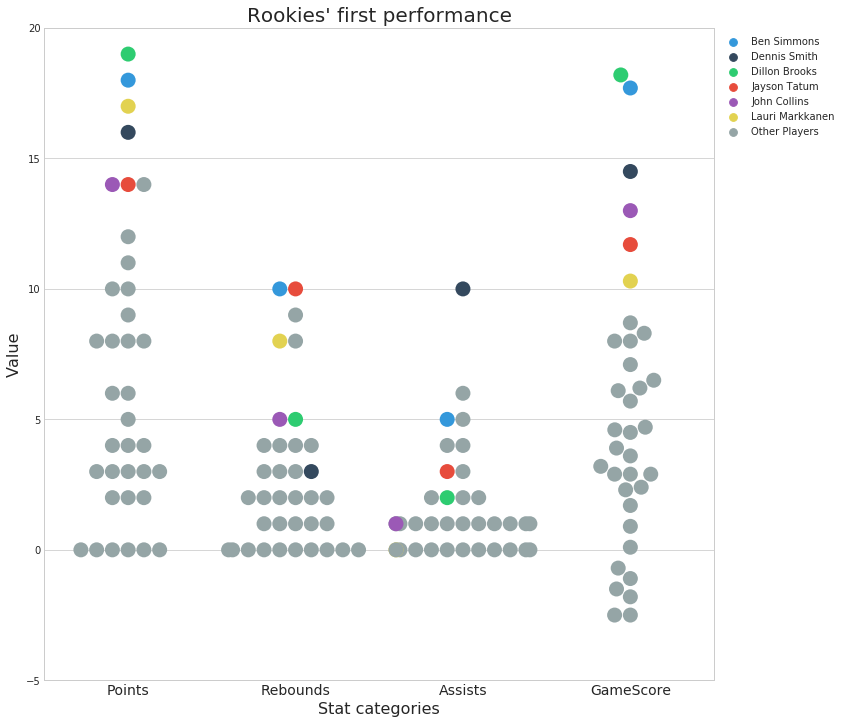

In [9]:
plt.figure(figsize=(12, 12))

colors = ["#3498db", "#34495e", "#2ecc71", "#e74c3c","#9b59b6","#e2d251" ,"#95a5a6"]
c_pal = sns.color_palette(colors)

melted_data = pd.melt(rookies_data, id_vars='Player', value_vars=['Points', 'Rebounds', 'Assists', 'GameScore'], var_name='Stat categories')
sns.set_style(style='whitegrid')
ax = sns.swarmplot(x='Stat categories', y='value', data=melted_data, hue='Player', size=15, palette=c_pal)
ax.set_title('Rookies\' first performance', size=20)
ax.set_ylabel('Value', size=16)
ax.set_xlabel('Stat categories', size=16)
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=14)
#ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=14)
ax.set_ylim(-5, 20, emit=False)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.legend_.set_bbox_to_anchor(bbox=(1, 1))


In [10]:
first_picks_list = ['Markelle Fultz', u'Ben Simmons', u'Karl-Anthony Towns', u'Andrew Wiggins', u'Anthony Bennett', u'Anthony Davis', u'Kyrie Irving', u'John Wall', u'Blake Griffin', u'Derrick Rose', u'Greg Oden', u'Andrea Bargnani', u'Andrew Bogut', u'Dwight Howard', u'LeBron James', u'Yao Ming', u'Kwame Brown', u'Kenyon Martin', u'Elton Brand', u'Michael Olowokandi', u'Tim Duncan', u'Allen Iverson', u'Joe Smith', u'Glenn Robinson', u'Chris Webber', u"Shaquille O'Neal", u'Larry Johnson', u'Derrick Coleman', u'Pervis Ellison', u'Danny Manning', u'David Robinson', u'Brad Daugherty', u'Patrick Ewing', u'Hakeem Olajuwon', u'Ralph Sampson', u'James Worthy', u'Mark Aguirre', u'Joe Barry Carroll', u'Magic Johnson', u'Mychal Thompson', u'Kent Benson', u'John Lucas', u'David Thompson', u'Bill Walton', u'Doug Collins', u'LaRue Martin', u'Austin Carr', u'Bob Lanier', u'Kareem Abdul-Jabbar', u'Elvin Hayes', u'Jimmy Walker', u'Cazzie Russell', u'Fred Hetzel', u'Jim Barnes', u'Art Heyman', u'Bill McGill', u'Walt Bellamy', u'Oscar Robertson', u'Bob Boozer', u'Elgin Baylor', u'Hot Rod Hundley', u'Si Green', u'Dick Ricketts', u'Frank Selvy', u'Ray Felix', u'Mark Workman', u'Gene Melchiorre', u'Chuck Share', u'Howie Shannon', u'Andy Tonkovich', u'Clifton McNeeley']

In [33]:
rookies_since_1983 = pd.read_csv('../../Data/rookies_swarm_first/rookie_debuts_since_1983.csv')
splits = rookies_since_1983.Player.str.split('\\')
names = [name for name, url in splits.tolist()]
rookies_since_1983.Player = names

In [34]:
first_picks = rookies_since_1983[rookies_since_1983['Player'].isin(first_picks_list)]
first_picks = first_picks.drop(first_picks[first_picks.Rk == 1615].index) # drop son of Ewing
first_picks = first_picks.drop(first_picks[first_picks.Rk == 1485].index) # drop son of Robinson

In [35]:
first_picks

,Rk,Player,Age,Pos,Date,Tm,Unnamed: 6,Opp,Unnamed: 8,GS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
2,3,LeBron James,18-303,F-G,2003-10-29,CLE,@,SAC,L,1,...,2.0,4.0,6,9,4,0,2.0,3,25,24.7
3,4,David Robinson,24-090,C,1989-11-04,SAS,NaN,LAL,W,1,...,7.0,10.0,17,1,1,3,3.0,5,23,23.2
5,6,Allen Iverson,21-147,G,1996-11-01,PHI,NaN,MIL,L,1,...,2.0,0.0,2,6,1,0,3.0,5,30,22.3
11,12,Blake Griffin,21-225,F,2010-10-27,LAC,NaN,POR,L,1,...,9.0,5.0,14,4,1,0,2.0,4,20,20.6
15,16,Anthony Davis,19-234,F-C,2012-10-31,NOH,NaN,SAS,L,1,...,3.0,4.0,7,0,1,1,0.0,0,21,20.0
26,27,Ben Simmons,21-090,G-F,2017-10-18,PHI,@,WAS,L,1,...,3.0,7.0,10,5,2,1,1.0,3,18,17.7
34,35,Hakeem Olajuwon,21-280,C,1984-10-27,HOU,@,DAL,W,1,...,6.0,3.0,9,1,0,1,3.0,4,24,16.5
50,51,Chris Webber,20-253,F-C,1993-11-09,GSW,NaN,HOU,L,1,...,1.0,6.0,7,3,3,2,1.0,3,15,15.0
63,64,Andrew Bogut,20-338,C,2005-11-01,MIL,@,PHI,W,1,...,4.0,5.0,9,1,0,3,1.0,4,13,13.6
66,67,Dwight Howard,18-331,C,2004-11-03,ORL,NaN,MIL,W,1,...,3.0,7.0,10,2,3,4,1.0,3,12,13.5


In [36]:
interesting_columns = ['Player', 'MP','PTS', 'TRB', 'AST', 'GmSc']
first_picks = first_picks[interesting_columns]
first_picks = first_picks.rename(columns={'TRB' : 'Rebounds', 'PTS' : 'Points', 'AST' : 'Assists', 'GmSc' : 'GameScore', 'MP' : 'Minutes'})

In [37]:


interesting_players = ['Ben Simmons', 'Markelle Fultz', 'LeBron James', 'Anthony Davis', 'Allen Iverson', 'David Robinson', 'Blake Griffin', 'Hakeem Olajuwon']
all_names = first_picks.Player.tolist()
cluster_list = [name if name in interesting_players else 'Other Players' for name in all_names]
first_picks.Player = cluster_list
first_picks = first_picks.sort_values(by='Player')

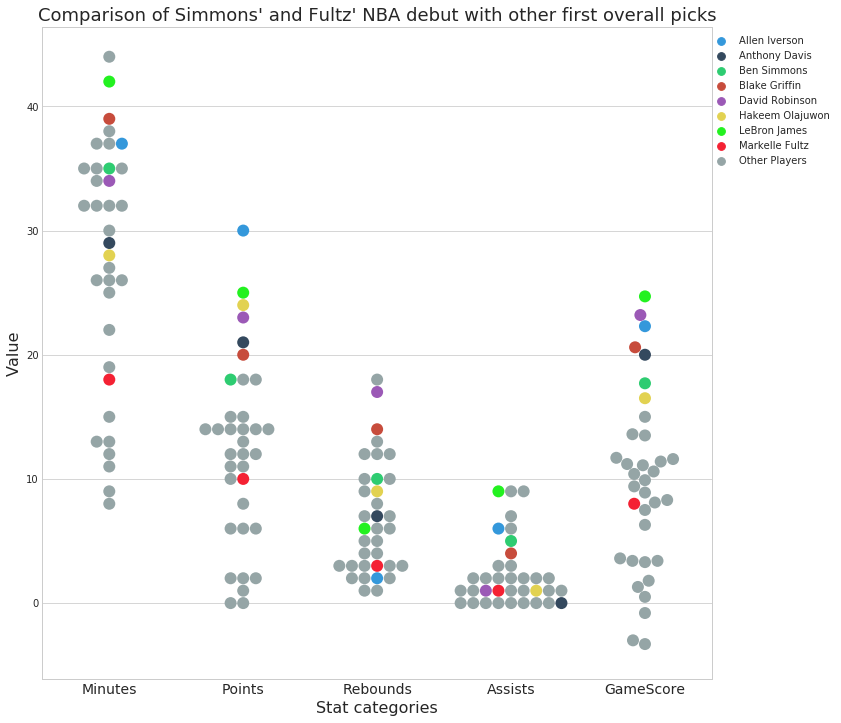

In [40]:
plt.figure(figsize=(12, 12))

#colors = ["#3498db", "#e74c3c","#a5a5a6"]
#c_pal = sns.color_palette(colors)

colors = ["#3498db", "#34495e", "#2ecc71", "#c74c3c","#9b59b6", "#e2d251", "#23f120", "#f42133","#95a5a6"]
c_pal = sns.color_palette(colors)

melted_data = pd.melt(first_picks, id_vars='Player', value_vars=['Minutes', 'Points', 'Rebounds', 'Assists', 'GameScore'], var_name='Stat categories')
sns.set_style(style='whitegrid')
ax = sns.swarmplot(x='Stat categories', y='value', data=melted_data, hue='Player', size=12, palette=c_pal)
ax.set_title('Comparison of Simmons\' and Fultz\' NBA debut with other first overall picks', size=18)
ax.set_ylabel('Value', size=16)
ax.set_xlabel('Stat categories', size=16)
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=14)
#ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.legend_.set_bbox_to_anchor(bbox=(1.19, 1))